<a href="https://colab.research.google.com/github/divyanshraiswal/qwen-vl-understandin/blob/main/Qwen_VL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install git+https://github.com/huggingface/transformers

  Cloning https://github.com/huggingface/transformers to /tmp/pip-req-build-1wpu2z6h
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers /tmp/pip-req-build-1wpu2z6h
  Resolved https://github.com/huggingface/transformers to commit 2e24ee4dfa39cc0bc264b89edbccc373c8337086
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 35.8 MB/s eta 0:00:00
  Created wheel for transformers: filename=transformers-4.46.0.dev0-py3-none-any.whl size=9922875 sha256=9a05e2fc3d850df4d1db1ca47bb462586d38d84ba6d82d97fb047584d1bcef96
  Stored in directory: /tmp/pip-ephem-wheel-cache-c3bs1qme/wheels/c0/14/d6/6c9a5582d2ac191ec0a483be151a4495fe1eb2a6706ca49f1b
Successfully built transformers
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully u

In [3]:
from transformers import Qwen2VLForConditionalGeneration, AutoTokenizer,AutoProcessor

In [6]:
model=Qwen2VLForConditionalGeneration.from_pretrained(
    "Qwen/Qwen2-VL-2B-Instruct",
    torch_dtype="auto",
    device_map="auto"
    )

processor=AutoProcessor.from_pretrained(
    "Qwen/Qwen2-VL-2B-Instruct"
    )


Unrecognized keys in `rope_scaling` for 'rope_type'='default': {'mrope_section'}


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/347 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

In [8]:
from PIL import Image
import requests

In [12]:
image=Image.open("my.jpg")

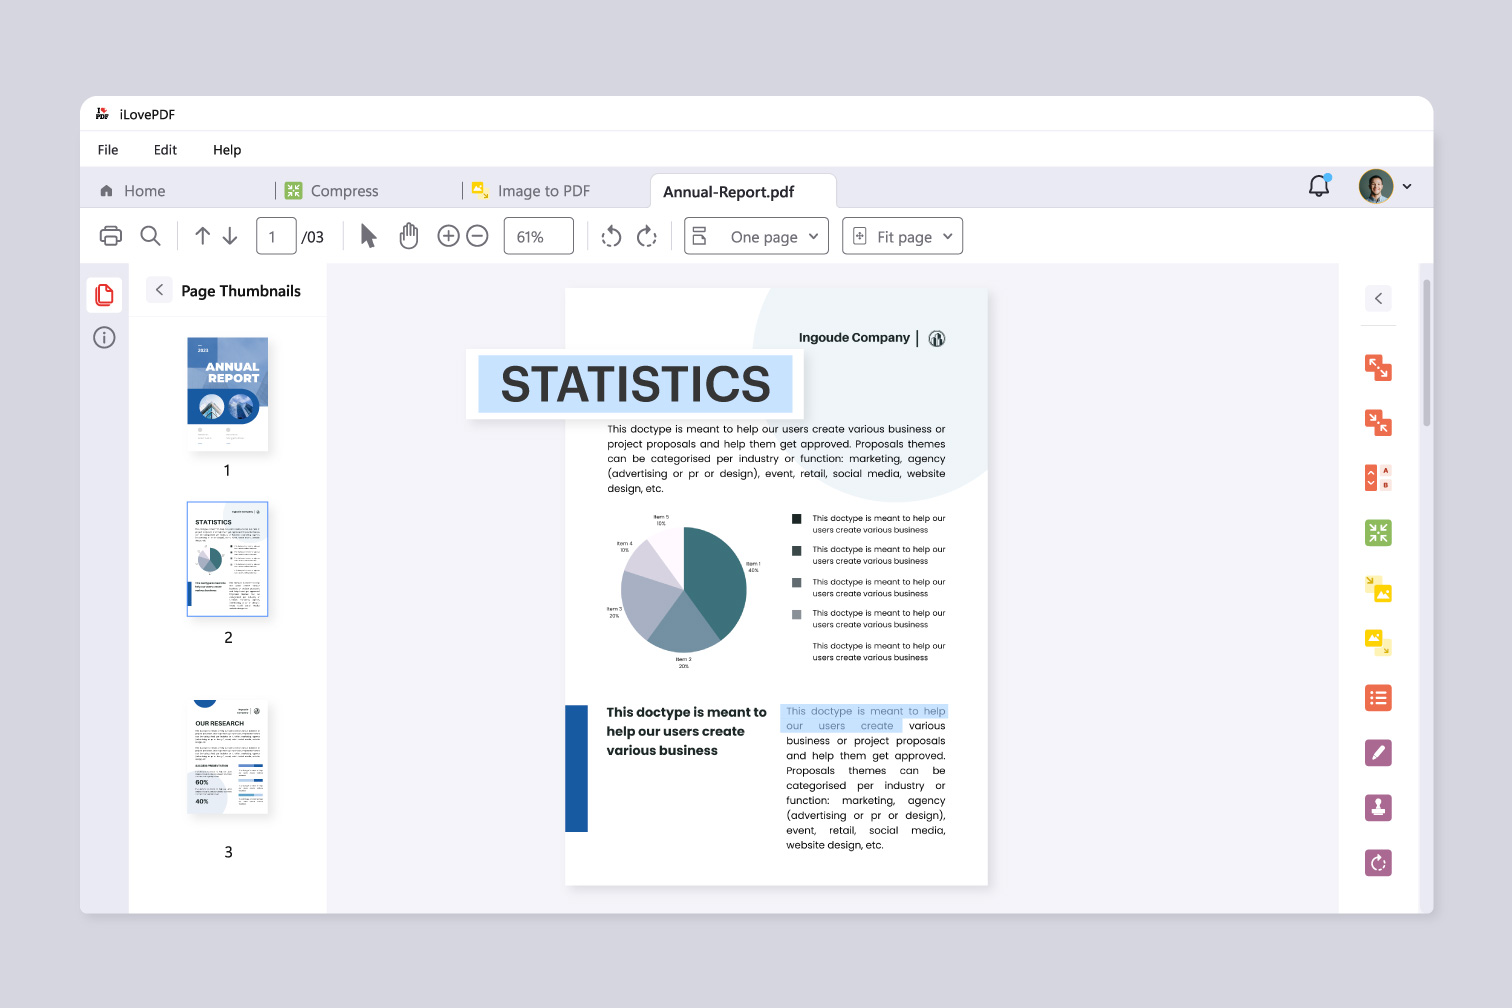

In [13]:
image

In [21]:
messages=[
    {
        "role":"user",
        "content":[
            {
                "type":"image",

            },
            {
                "type":"text",
                "text":"Tell me all the text from this image",
            }
        ]
    }
]

text_prompt=processor.apply_chat_template(messages,add_generation_prompt=True)

inputs=processor(
    text=text_prompt,
    images=image,
    padding=True,
    return_tensors="pt",
)

inputs=inputs.to("cuda") #if Gpu not availabe use model.device

output_ids=model.generate(
    **inputs,
    max_new_tokens=1024
    )

generated_ids=[
    output_ids[len(input_ids) :]
    for input_ids ,output_ids in zip(inputs.input_ids,output_ids)
]

output_text=processor.batch_decode(generated_ids,skip_special_tokens=True,clean_up_tokenization_space=True)

print(output_text)

['Certainly! Here is the text from the image:\n\n---\n\n**STATISTICS**\n\nThis doctype is meant to help our users create various business or project proposals and help them get approved. Proposals themes can be categorised per industry or function: marketing, agency (advertising or pr or design), event, retail, social media, website design, etc.\n\n**Ingoude Company**\n\nThis doctype is meant to help our users create various business\n\n**Statistics**\n\nThis doctype is meant to help our users create various business\n\n**Statistics**\n\nThis doctype is meant to help our users create various business\n\n**Statistics**\n\nThis doctype is meant to help our users create various business\n\n**Statistics**\n\nThis doctype is meant to help our users create various business\n\n**Statistics**\n\nThis doctype is meant to help our users create various business\n\n**Statistics**\n\nThis doctype is meant to help our users create various business\n\n**Statistics**\n\nThis doctype is meant to help o

In [26]:
# Assuming output_text is a list
output_text_str = " ".join(output_text)  # Join list elements into a single string
unique_lines = set(output_text_str.split("\n"))  # Split by line and deduplicate

for line in unique_lines:
    print(line)


Certainly! Here is the text from the image:

---
This doctype is meant to help our users create various business
**Ingoude Company**
This doctype is meant to help our users create various business or project proposals and help them get approved. Proposals themes can be categorised per industry or function: marketing, agency (advertising or pr or design), event, retail, social media, website design, etc.
**Statistics**
This doctype
**STATISTICS**
